In [30]:
import sys
path_to_pip_installs = "/tmp/test_env"
if path_to_pip_installs not in sys.path:
    sys.path.insert(0, path_to_pip_installs)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
from torch.utils.data import DataLoader
from pytorch_dataset import HDF5ContrastDataset

In [1]:
import torch, platform
print("PyTorch:", torch.__version__)
print("Compiled for CUDA:", torch.version.cuda)
print("Is CUDA available now?:", torch.cuda.is_available())

PyTorch: 2.7.0+cu126
Compiled for CUDA: 12.6
Is CUDA available now?: False


## My data

In [ ]:
cfg_transform = {
  "fit": [
    {"PerImageMinMaxNormalize": {}}
  ],
  "eval": [
    {"PerImageMinMaxNormalize": {}}

  ]
}

In [43]:
cfg_filters = {
  "contrast__in": ["DIXON"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "W",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"train",
}

# Load the synthetic dataset
dataset_train = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_DIXON.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

In [44]:
cfg_filters = {
  "contrast__in": ["DIXON"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "W",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"val",
}

# Load the synthetic dataset
dataset_val = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_DIXON.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

In [47]:
cfg_filters = {
  "contrast__in": ["DIXON"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "W",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"test",
}

# Load the synthetic dataset
dataset_test = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_DIXON.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

In [48]:
cfg_filters = {
  "contrast__in": ["T1_mapping_fl2d"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "s",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"train",
}

# Load the synthetic dataset
dataset_T1_train = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_T1_mapping_fl2d.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

cfg_filters = {
  "contrast__in": ["T1_mapping_fl2d"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "s",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"val",
}

# Load the synthetic dataset
dataset_T1_val = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_T1_mapping_fl2d.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

cfg_filters = {
  "contrast__in": ["T1_mapping_fl2d"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "s",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"test",
}

# Load the synthetic dataset
dataset_T1_test = HDF5ContrastDataset(
    hdf5_path="/home/students/studweilc1/SynthRegGAN/data/data_T1_mapping_fl2d.h5",  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

In [30]:
dataset[0]["image"].shape

torch.Size([1, 256, 256])

In [33]:
import numpy as np
import h5py
import torch

def save_dataset_as_mat(dataset, out_file, var='data_fs', compression='gzip'):
    """Save so that LoadDataSet() shows the image upright."""
    import numpy as np, h5py, torch

    imgs = []
    for i in range(len(dataset)):
        img = dataset[i]['image']          # (1,256,256)  channel‑first
        if isinstance(img, torch.Tensor):
            img = img.cpu().numpy()
        img = img.squeeze(0) .T            # <-- transpose here (W, H)
        imgs.append(img.astype(np.float32))

    imgs = np.stack(imgs, axis=0)          # (N,256,256)
    with h5py.File(out_file, 'w') as f:
        f.create_dataset(var, data=imgs,
                         dtype='float32', compression=compression)

    print(f'✔ Saved {len(imgs)} slices to {out_file} (will load as (N,1,256,256))')



In [49]:
save_dataset_as_mat(dataset_train,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_train_DIXON.h5")

save_dataset_as_mat(dataset_val,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_val_DIXON.h5")

save_dataset_as_mat(dataset_test,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_test_DIXON.h5")

✔ Saved 1180 slices to /home/students/studweilc1/SynDiff/my_data/data_train_DIXON.h5 (will load as (N,1,256,256))
✔ Saved 137 slices to /home/students/studweilc1/SynDiff/my_data/data_val_DIXON.h5 (will load as (N,1,256,256))
✔ Saved 149 slices to /home/students/studweilc1/SynDiff/my_data/data_test_DIXON.h5 (will load as (N,1,256,256))


In [50]:
save_dataset_as_mat(dataset_T1_train,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_train_T1.h5")

save_dataset_as_mat(dataset_T1_val,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_val_T1.h5")

save_dataset_as_mat(dataset_T1_test,
    out_file="/home/students/studweilc1/SynDiff/my_data/data_test_T1.h5")

✔ Saved 1188 slices to /home/students/studweilc1/SynDiff/my_data/data_train_T1.h5 (will load as (N,1,256,256))
✔ Saved 135 slices to /home/students/studweilc1/SynDiff/my_data/data_val_T1.h5 (will load as (N,1,256,256))
✔ Saved 139 slices to /home/students/studweilc1/SynDiff/my_data/data_test_T1.h5 (will load as (N,1,256,256))


# Create datasets

In [12]:
contrasts = ["DIXON", "BOLD", "ASL", "Diffusion", "T1_mapping_fl2d", "T1_mapping_VIBE", "T2_mapping_PREP"]

overview_df_ls = []

for contrast  in contrasts:
    hdf5_path = f"/home/students/studweilc1/SynthRegGAN/data/data_{contrast}.h5"
    with h5py.File(hdf5_path, 'r') as h5f:
        metadata = pd.read_hdf(hdf5_path, key="metadata")
    
    #tmp_df = metadata.groupby("contrast")[["image_type", "image_dim"]].agg(lambda x: list(set(x.tolist())))
    tmp_df = metadata
    overview_df_ls.append(tmp_df)
overview_df = pd.concat(overview_df_ls).reset_index()

In [24]:
image_dimension_dict = {
    "DIXON":"W",
    "ASL":"RBF",
    "BOLD":"s",
    "Diffusion":"TRACEW",
    "T1_mapping_VIBE":"FLIP1",
    "T1_mapping_fl2d":"s",
}
overview_df_filtered = overview_df.copy()

ls_of_df = []

for key, value in image_dimension_dict.items():
    tmp = overview_df_filtered[(overview_df_filtered["contrast"] == key) &
                               (overview_df_filtered["image_type"] == value) &
                               (overview_df_filtered["image_dim"] == 0)]
    
    ls_of_df.append(tmp)

overview_df_filtered = pd.concat(ls_of_df).reset_index(drop=True)
available_slices = overview_df_filtered.groupby("contrast")[["patient_id", "z_dim"]].agg(lambda x: list(set(x.tolist())))
available_slices["number_of_slices"] = available_slices.apply(lambda x: len(x["z_dim"])*len(x["patient_id"]), axis=1)

In [25]:
available_slices

,patient_id,z_dim,number_of_slices
contrast,,,
ASL,"[V_06_A, P_16_B, P_03_A, P_16_D, P_22_A, P_09_...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2560
BOLD,"[V_06_A, P_16_B, P_03_A, P_16_D, P_22_A, P_09_...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2560
DIXON,"[V_06_A, P_16_B, P_03_A, P_16_D, P_22_A, P_09_...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2592
Diffusion,"[V_06_A, P_16_B, P_03_A, P_16_D, P_22_A, P_09_...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2560
T1_mapping_VIBE,"[P_04_A, P_02_D, V_07_A, V_05_B, V_06_A, P_09_...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",1120
T1_mapping_fl2d,"[V_06_A, P_16_B, P_03_A, P_16_D, P_22_A, P_09_...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",2560


In [26]:
overview_df_filtered

,level_0,index,patient_id,contrast,z_dim,image_dim,image_type,non_zero,mask_size,split
0,64,64,P_01_A,DIXON,0,0,W,False,0,train
1,65,65,P_01_A,DIXON,1,0,W,False,0,train
2,66,66,P_01_A,DIXON,2,0,W,False,0,train
3,67,67,P_01_A,DIXON,3,0,W,False,0,train
4,68,68,P_01_A,DIXON,4,0,W,False,0,train
...,...,...,...,...,...,...,...,...,...,...
13979,2555,2555,V_12_B,T1_mapping_fl2d,27,0,s,False,0,train
13980,2556,2556,V_12_B,T1_mapping_fl2d,28,0,s,False,0,train
13981,2557,2557,V_12_B,T1_mapping_fl2d,29,0,s,False,0,train
13982,2558,2558,V_12_B,T1_mapping_fl2d,30,0,s,False,0,train


In [31]:

def get_patient_z_dim_combinations(overview_df_filtered, contrast_list):
    contrast_groups = overview_df_filtered[overview_df_filtered["contrast"].isin(contrast_list)].groupby('contrast').apply(
        lambda g: set(zip(g['patient_id'], g['z_dim']))
    )

    # Step 2: Take the intersection of all sets
    common_combinations = set.intersection(*contrast_groups)

    # Step 3: Convert back to a DataFrame if needed
    result_df = pd.DataFrame(list(common_combinations), columns=['patient_id', 'z_dim'])

    return result_df

def load_dataset(base_path, contrast, image_type, split="train", image_dim=0):
    # Load the synthetic dataset
    cfg_filters = {
        "contrast__in": [contrast],
        "non_zero": True,
        "image_dim": 0,
        "image_type": image_type,
        "split":split,
    }
    dataset = HDF5ContrastDataset(
        hdf5_path=f"{base_path}/data_{contrast}.h5",
        filter=cfg_filters,
        transform=cfg_transform,
        stage="eval",  
    )
    return dataset

contrast_list = ["DIXON", "T1_mapping_fl2d"]
tmp = get_patient_z_dim_combinations(overview_df_filtered, contrast_list)

tmp

/tmp/ipykernel_211013/3410592865.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  contrast_groups = overview_df_filtered[overview_df_filtered["contrast"].isin(contrast_list)].groupby('contrast').apply(


,patient_id,z_dim
0,P_15_D,19
1,P_07_A,15
2,P_24_B,24
3,V_12_A,20
4,P_21_B,16
...,...,...
2555,P_11_B,9
2556,P_22_C,4
2557,P_08_A,1
2558,V_05_B,8


In [8]:
overview_df.groupby("contrast")[["image_type", "image_dimensions"]].agg(lambda x: list(set(x.tolist())))

,image_type,image_dimensions
contrast,,
ASL,"[RBF, M0]",[0]
BOLD,[s],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
DIXON,"[in, W, opp, F]",[0]
Diffusion,"[RR, TRACEW]","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
T1_mapping_VIBE,"[T1, FLIP2, FLIP1]",[0]
T1_mapping_fl2d,[s],[0]
T2_mapping_PREP,[s],"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [42]:
def load_dataset(base_path, contrast, image_type, split="train", image_dim=0):
    # Load the synthetic dataset
    cfg_filters = {
        "contrast__in": [contrast],
        "non_zero": True,
        "image_dim": image_dim,
        "image_type": image_type,
        "split":split,
    }
    dataset = HDF5ContrastDataset(
        hdf5_path=f"{base_path}/data_{contrast}.h5",
        filter=cfg_filters,
        transform=cfg_transform,
        stage="eval",  
    )
    return dataset


def save_both_dataset_as_mat(dataset1, dataset2, out_file1, out_file2, var='data_fs', compression='gzip'):
    """Save so that LoadDataSet() shows the image upright."""

    imgs_1 = []
    imgs_2 = []
    already_vistied_j = set()  # To avoid duplicate processing of dataset2
    for i in range(len(dataset1)):
        img_1 = dataset1[i]['image']          # (1,256,256)  channel‑first
        img_1_metadata = dataset1[i]['metadata']
        for j in range(len(dataset2)):
            if j in already_vistied_j:
                continue
            img_2_metadata = dataset2[j]['metadata']
            if img_1_metadata['patient_id'] == img_2_metadata['patient_id'] and img_1_metadata['z_dim'] == img_2_metadata['z_dim']:
                img_2 = dataset2[j]['image']
                if isinstance(img_1, torch.Tensor):
                    img_1 = img_1.cpu().numpy()
                img_1 = img_1.squeeze(0).T            # <-- transpose here (W, H)
                imgs_1.append(img_1.astype(np.float32))
                if isinstance(img_2, torch.Tensor):
                    img_2 = img_2.cpu().numpy()
                img_2 = img_2.squeeze(0).T            # <-- transpose here
                imgs_2.append(img_2.astype(np.float32))
                already_vistied_j.add(j)
                break

    imgs_1 = np.stack(imgs_1, axis=0)          # (N,256,256)
    with h5py.File(out_file1, 'w') as f:
        f.create_dataset(var, data=imgs_1,
                         dtype='float32', compression=compression)
        
    print(f'Saved {len(imgs_1)} slices to {out_file1} (will load as (N,1,256,256))')
        
    imgs_2 = np.stack(imgs_2, axis=0)          # (N,256,256)
    with h5py.File(out_file2, 'w') as f:
        f.create_dataset(var, data=imgs_2,
                         dtype='float32', compression=compression)

    print(f'Saved {len(imgs_2)} slices to {out_file2} (will load as (N,1,256,256))')

In [ ]:
cfg_transform = {
  "fit": [
    {"PerImageMinMaxNormalize": {}}
  ],
  "eval": [
    {"PerImageMinMaxNormalize": {}}

  ]
}

In [45]:
cfg_transform = {
  "fit": [
    {"PerImageMinMaxNormalize": {}}
  ],
  "eval": [
    {"PerImageMinMaxNormalize": {}}

  ]
}


base_path = "/home/students/studweilc1/SynthRegGAN/data"

contrast1 = "DIXON"
contrast2 = "T1_mapping_VIBE"

dataset1_train = load_dataset(base_path, contrast1, "W", split="train")
dataset2_train = load_dataset(base_path, contrast2, "FLIP2", split="train")

dataset1_val = load_dataset(base_path, contrast1, "W", split="val")
dataset2_val = load_dataset(base_path, contrast2, "FLIP2", split="val")

dataset1_test = load_dataset(base_path, contrast1, "W", split="test")
dataset2_test = load_dataset(base_path, contrast2, "FLIP2", split="test")




In [ ]:

p = f"{base_path}/data_{contrast2}.h5"

cfg_filters = {
    "contrast__in": [contrast],
    "non_zero": True,
    "image_dim": 0,
    "image_type": "s",
    "split":split,
}
dataset = HDF5ContrastDataset(
    hdf5_path=p,
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  
)


In [47]:
import torch

In [48]:
save_both_dataset_as_mat(dataset1_train, dataset2_train, out_file1 ="/home/students/studweilc1/SynDiff/my_data/data_train_DIXON_T1_mapping_VIBE.h5", out_file2="/home/students/studweilc1/SynDiff/my_data/data_train_T1_mapping_VIBE")

Saved 394 slices to /home/students/studweilc1/SynDiff/my_data/data_train_DIXON_T1_mapping_VIBE.h5 (will load as (N,1,256,256))
Saved 394 slices to /home/students/studweilc1/SynDiff/my_data/data_train_T1_mapping_VIBE (will load as (N,1,256,256))


In [41]:
len(dataset2_train)

0

## SynDiff Data

In [49]:
def LoadDataSet(load_dir, variable = 'data_fs', padding = True, Norm = True):
    f = h5py.File(load_dir,'r') 
    if np.array(f[variable]).ndim==3:
        data=np.expand_dims(np.transpose(np.array(f[variable]),(0,2,1)),axis=1)

    else:
        data=np.transpose(np.array(f[variable]),(1,0,3,2))
    data=data.astype(np.float32) 
    if padding:
        pad_x=int((256-data.shape[2])/2)
        pad_y=int((256-data.shape[3])/2)
        print('padding in x-y with:'+str(pad_x)+'-'+str(pad_y))
        data=np.pad(data,((0,0),(0,0),(pad_x,pad_x),(pad_y,pad_y)))   
    if Norm:    
        data=(data-0.5)/0.5      
    return data

In [55]:
path = "/home/students/studweilc1/SynDiff/my_data/data_train_DIXON_T1_mapping_VIBE.h5"

mat_dixon = LoadDataSet(path, variable='data_fs', padding=True, Norm=False)

path = "/home/students/studweilc1/SynDiff/my_data/data_train_T1_mapping_VIBE.h5"

mat_T1 = LoadDataSet(path, variable='data_fs', padding=True, Norm=False)

padding in x-y with:0-0
padding in x-y with:0-0


In [56]:
mat_dixon.shape, mat_T1.shape

((394, 1, 256, 256), (359, 1, 256, 256))

#### Test loading

In [ ]:
mat_Dixon = LoadDataSet("/home/students/studweilc1/SynDiff/SynDiff_sample_data/data_DIXON_T.h5", variable='data_fs', padding=True, Norm=False, Transpose=True)

padding in x-y with:0-0


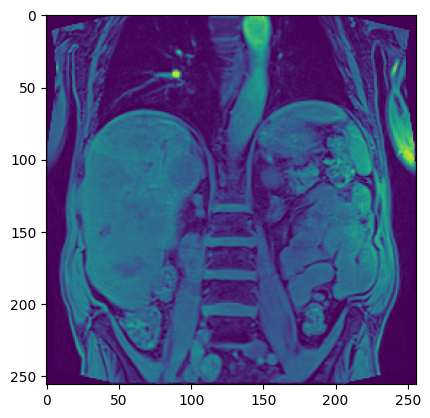

In [39]:
plt.imshow(mat_Dixon[100,0,:,:])

## Synthetic Datasets

In [73]:
path_synth_t1_train = "synthetic_data/synth_T1_train.h5"
path_synth_t1_test = "synthetic_data/synth_T1_test.h5"
path_dixon = "/home/students/studweilc1/SynthRegGAN/data/data_DIXON.h5"
path_t1 = "/home/students/studweilc1/SynthRegGAN/data/data_T1_mapping_fl2d.h5"

cfg_transform = {
  "fit": [
    {"PerImageMinMaxNormalize": {}}
  ],
  "eval": [
    {"PerImageMinMaxNormalize": {}}

  ]
}

In [60]:
cfg_filters = {
  "contrast__in": ["DIXON"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "W",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"train",
}
# Load the synthetic dataset
dataset_DIXON_train= HDF5ContrastDataset(
    hdf5_path=path_dixon,  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

cfg_filters = {
  "contrast__in": ["DIXON"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "W",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"test",
}

# Load the synthetic dataset
dataset_DIXON_test= HDF5ContrastDataset(
    hdf5_path=path_dixon,  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)


In [74]:
cfg_filters = {
  "contrast__in": ["T1_mapping_fl2d"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "s",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"train",
}

# Load the synthetic dataset
dataset_T1_train = HDF5ContrastDataset(
    hdf5_path=path_t1,  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

cfg_filters = {
  "contrast__in": ["T1_mapping_fl2d"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "s",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"test",
}

# Load the synthetic dataset
dataset_T1_test = HDF5ContrastDataset(
    hdf5_path=path_t1,  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

In [66]:
cfg_filters = {
  "contrast__in": ["T1_mapping_fl2d"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "s",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"train",
}

# Load the synthetic dataset
dataset_synth_T1_train = HDF5ContrastDataset(
    hdf5_path=path_synth_t1_train,  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

cfg_filters = {
  "contrast__in": ["T1_mapping_fl2d"],
  "non_zero": True,
  "image_dim": 0,
  "image_type": "s",
  #"patient_id": "P_01_A",
  #"z_dim": 16,
  "split":"test",
}

# Load the synthetic dataset
dataset_synth_T1_test = HDF5ContrastDataset(
    hdf5_path=path_synth_t1_test,  # or data_synthetic_DIXON_to_T1.h5
    filter=cfg_filters,
    transform=cfg_transform,
    stage="eval",  # or "fit", depending on your use
)

In [67]:
len(dataset_DIXON_train), len(dataset_DIXON_test), len(dataset_synth_T1_train)

(1180, 149, 1188)

In [68]:
def find_sample(dataset, patient_id, z_dim):
    for i in range(len(dataset)):
        if dataset[i]['metadata']['patient_id'] == patient_id and dataset[i]['metadata']['z_dim'] == z_dim:
            return dataset[i]
    return None

#### Train

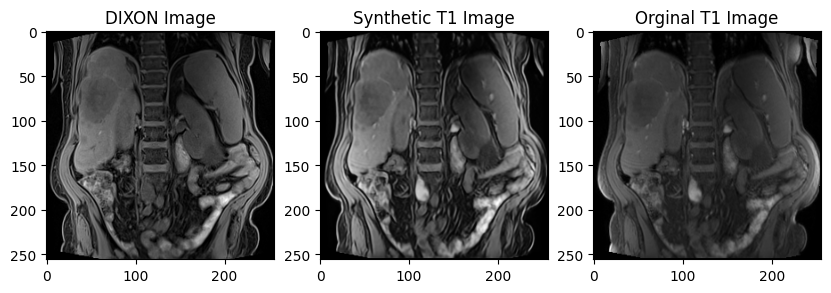

In [75]:
sample_dixon_train = dataset_DIXON_train[20]
patient_id = sample_dixon_train['metadata']['patient_id']
z_dim = sample_dixon_train['metadata']['z_dim']
sample_synth_t1_train = find_sample(dataset_synth_T1_train, patient_id, z_dim)
sample_t1_train = find_sample(dataset_T1_train, patient_id, z_dim)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(sample_dixon_train['image'].squeeze(0), cmap='gray')
axs[0].set_title('DIXON Image')
axs[1].imshow(sample_synth_t1_train['image'].squeeze(0), cmap='gray')
axs[1].set_title('Synthetic T1 Image')
axs[2].imshow(sample_t1_train['image'].squeeze(0), cmap='gray')
axs[2].set_title('Orginal T1 Image')
plt.show()

#### Test

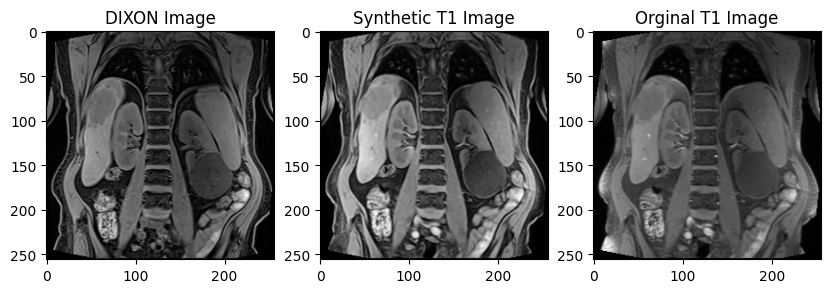

In [82]:
sample_dixon_test = dataset_DIXON_test[10]
patient_id = sample_dixon_test['metadata']['patient_id']
z_dim = sample_dixon_test['metadata']['z_dim']
sample_synth_t1_test = find_sample(dataset_synth_T1_test, patient_id, z_dim)
sample_t1_test = find_sample(dataset_T1_test, patient_id, z_dim)

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(sample_dixon_test['image'].squeeze(0), cmap='gray')
axs[0].set_title('DIXON Image')
axs[1].imshow(sample_synth_t1_test['image'].squeeze(0), cmap='gray')
axs[1].set_title('Synthetic T1 Image')
axs[2].imshow(sample_t1_test['image'].squeeze(0), cmap='gray')
axs[2].set_title('Orginal T1 Image')
plt.show()

## Smoothing

In [83]:
import numpy as np
from skimage.exposure import match_histograms
import matplotlib.pyplot as plt

def compute_global_histogram(image_list, bins=256, value_range=(0, 1)):
    """
    Compute normalized histogram from a list of images.
    Returns histogram and bin edges.
    """
    all_pixels = np.concatenate([img.flatten() for img in image_list])
    hist, bin_edges = np.histogram(all_pixels, bins=bins, range=value_range, density=True)
    return hist, bin_edges

def compute_global_reference_image(image_list):
    """
    Stack all images and use as a pseudo-reference for histogram matching.
    This works well with match_histograms from skimage.
    """
    stacked = np.concatenate([img.flatten() for img in image_list])
    pseudo_image = stacked.reshape(-1, 1)  # Flattened 1D image
    return pseudo_image

def match_to_global_distribution(synthetic_image, reference_pixels):
    """
    Match histogram of a synthetic image to the global reference.
    """
    # Reshape back into 2D after matching
    matched = match_histograms(synthetic_image, reference_pixels, channel_axis=None)
    return matched


In [84]:
real_dixon_images = []
for i in range(len(dataset_DIXON_train)):
    real_dixon_images.append(dataset_DIXON_train[i]['image'].squeeze(0).cpu().numpy())

    

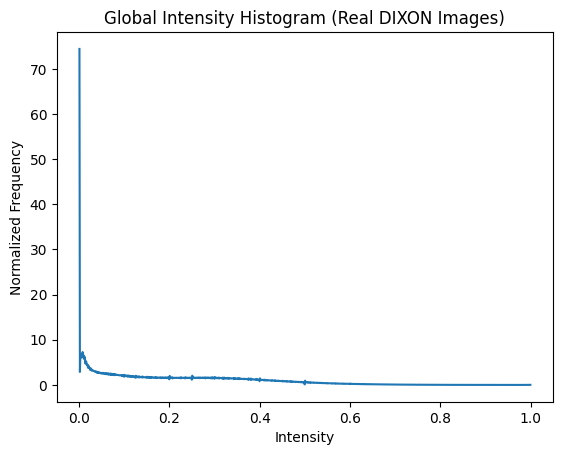

In [86]:
hist, bins = compute_global_histogram(real_dixon_images, bins=1000)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.plot(bin_centers, hist)
plt.title("Global Intensity Histogram (Real DIXON Images)")
plt.xlabel("Intensity")
plt.ylabel("Normalized Frequency")
plt.show()

In [87]:
reference_pixels = compute_global_reference_image(real_dixon_images)

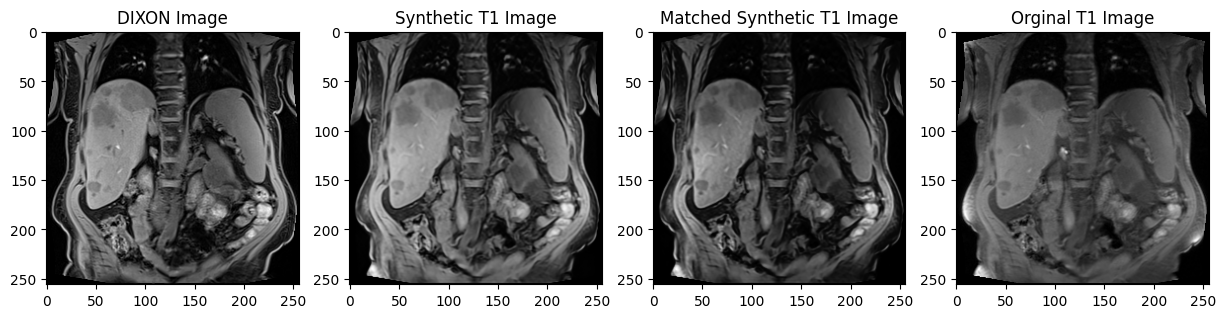

In [90]:
sample_dixon_test = dataset_DIXON_test[1]
patient_id = sample_dixon_test['metadata']['patient_id']
z_dim = sample_dixon_test['metadata']['z_dim']
sample_synth_t1_test = find_sample(dataset_synth_T1_test, patient_id, z_dim)
sample_t1_test = find_sample(dataset_T1_test, patient_id, z_dim)
matched_image = match_to_global_distribution(sample_synth_t1_test['image'].squeeze(0).cpu().numpy(), reference_pixels)

fig, axs = plt.subplots(1, 4, figsize=(15, 8))
axs[0].imshow(sample_dixon_test['image'].squeeze(0), cmap='gray')
axs[0].set_title('DIXON Image')
axs[1].imshow(sample_synth_t1_test['image'].squeeze(0), cmap='gray')
axs[1].set_title('Synthetic T1 Image')
axs[2].imshow(matched_image, cmap='gray')
axs[2].set_title('Matched Synthetic T1 Image')
axs[3].imshow(sample_t1_test['image'].squeeze(0), cmap='gray')
axs[3].set_title('Orginal T1 Image')
plt.show()